## Tarea Computacional N°1
Gestión de Cadenas de Suministros IND430.

Integrantes:
- Macarena Mujica
- Enzo Oyarce
- Augusta Pagueguy

## Problema 1. Localización único CD

Chein, famosa tienda de moda del sudeste asiático, está instalando su operación logística en Chile. Para atender de mejor forma a sus clientes está evaluando instalar un centro de distribución para atender centralizadamente todos los pedidos de la región. Las ubicaciones e importancias de cada cliente están dadas en la tabla Clientes1.csv: https://shorturl.at/bgty6

a) (10 pts) Con la información señalada, defina donde instalar UN centro de distribución para minimizar la distancia recorrida hacia los clientes. Evalúe la solución usando distancia rectilínea, euclidiana y cuadrática. Reporte cada una de las tres soluciones, grafique los puntos y los CD’s propuestos, así como el código usado para calcular. Para el caso de distancia euclidiana detenga el algoritmo una vez que el centro no haya cambiado más que 0,02.

b) (10 pts) Cerca de la solución propuesta con distancia cuadrática en la letra anterior hay una reserva natural donde se prohíben instalar cualquier tipo de instalaciones logísticas. La reserva está ubicada en el bloque X[-1,11], Y[-5,10] (imagine la reserva como un rectángulo con esas coordenadas). ¿Como ajustaría la solución para que el CD propuesto respete esa restricción y siga minimizando la distancia cuadrática total recorrida para atender? Reporte el código y el ajuste en la solución.

# Pregunta 1a

a) (10 pts) Defina donde instalar UN centro de distribución para minimizar la distancia recorrida hacia los clientes. Evalúe la solución usando distancia rectilínea, euclidiana y cuadrática. Reporte cada una de las tres soluciones, grafique los puntos y los CD’s propuestos, así como el código usado para calcular. Para el caso de distancia euclidiana detenga el algoritmo una vez que el centro no haya cambiado más que 0,02.


In [56]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import gurobipy as gp
from gurobipy import GRB

In [57]:
#Cargamos DataFrame
clientes = pd.read_csv('clientes1.csv')
clientes.head()

,x,y,peso
0,5.1717,11.9409,638.4000
1,11.1097,12.7871,1090.4400
2,14.3378,10.7421,538.2564
3,0.6172,12.8029,1190.6112
4,11.7165,11.2467,1210.8855


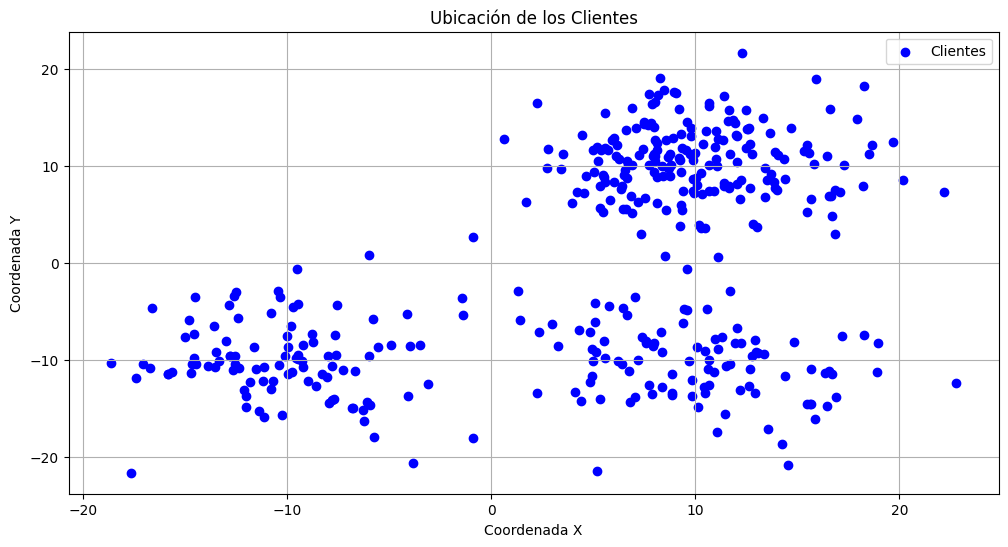

In [58]:
# Graficamos los puntos del DataFrame
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de tu gráfica
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')  # Puntos para los clientes

plt.title('Ubicación de los Clientes')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()


**Distancia Euclidiana**
$$
\min_{x,y} f(x, y) = \sum_{i=1}^{n} w_i \sqrt{(x - a_i)^2 + (y - b_i)^2}
$$

Dada la convexidad de la funcion objetivo, la solución está dada por:

$$
x = \frac{\sum_{i=1}^{n} a_i g_i(x, y)}{\sum_{i=1}^{n} g_i(x, y)}
$$

$$
y = \frac{\sum_{i=1}^{n} b_i g_i(x, y)}{\sum_{i=1}^{n} g_i(x, y)}
$$

donde la función $g_i(x, y)$ está dada por:

$$
g_i(x, y) = \frac{w_i}{\sqrt{(x - a_i)^2 + (y - b_i)^2}}
$$


In [59]:
#Distancia Euclidiana

# Inicializa las estimaciones para x e y
x = (clientes['x'] * clientes['peso']).sum() / clientes['peso'].sum()
y = (clientes['y'] * clientes['peso']).sum() / clientes['peso'].sum()

# Convergencia y parámetros de iteración
epsilon = 0.02 # umbral de convergencia
max_iter = 1000  # número máximo de iteraciones
iteracion = 0
cambio = float('inf')

# Iterar hasta la convergencia o el número máximo de iteraciones
while cambio > epsilon and iteracion < max_iter:
    # Calcula las g_i(x, y) para la estimación actual de x e y
    g_i = clientes['peso'] / np.sqrt((x - clientes['x'])**2 + (y - clientes['y'])**2)

    # Calcula las nuevas estimaciones de x e y
    new_x = np.sum(clientes['x'] * g_i) / np.sum(g_i)
    new_y = np.sum(clientes['y'] * g_i) / np.sum(g_i)

    # Calcula el cambio como la distancia euclidiana entre las estimaciones antiguas y nuevas
    cambio = np.sqrt((new_x - x)**2 + (new_y - y)**2)

    # Actualiza x e y
    x, y = new_x, new_y

    # Incrementa el contador de iteraciones
    iteracion += 1

# Imprime las coordenadas óptimas
print(f"La ubicación óptima del centro de distribución con distancia Euclidiana es: ({x}, {y})")



La ubicación óptima del centro de distribución con distancia Euclidiana es: (6.849340804380694, 2.7302468128073314)


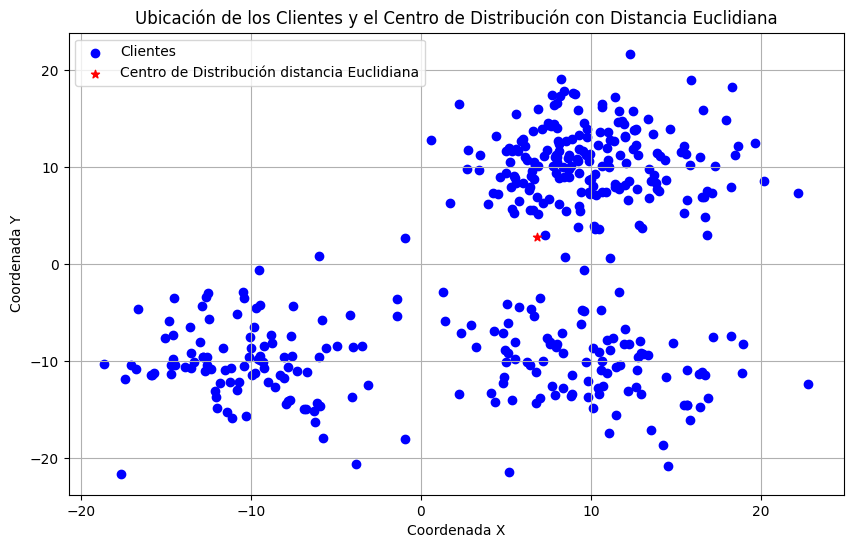

In [60]:
# Graficar los clientes y la ubicación óptima del CD con Distancia Euclidiana
plt.figure(figsize=(10, 6))
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')
plt.scatter(x, y, color='red', marker='*', label='Centro de Distribución distancia Euclidiana')
plt.title('Ubicación de los Clientes y el Centro de Distribución con Distancia Euclidiana')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

**Distancia Euclidiana al Cuadrado**

La función objetivo para minimizar la suma ponderada de las distancias euclidianas al cuadrado es:

$$
\min_{x, y} f(x, y) = \sum_{i=1}^{n} w_i \left((x - a_i)^2 + (y - b_i)^2\right)
$$

La solución para las coordenadas \( x \) e \( y \) es dada por:

$$
x = \frac{\sum_{i=1}^{n} w_i a_i}{\sum_{i=1}^{n} w_i}
$$

$$
y = \frac{\sum_{i=1}^{n} w_i b_i}{\sum_{i=1}^{n} w_i}
$$


In [61]:
# Calcula las coordenadas óptimas x e y
x_e = (clientes['x'] * clientes['peso']).sum() / clientes['peso'].sum()
y_e = (clientes['y'] * clientes['peso']).sum() / clientes['peso'].sum()

# Imprime las coordenadas óptimas
print(f"La ubicación óptima del centro de distribución usando distancia Euclidiana al Cuadrado es: ({x_e}, {y_e})")


La ubicación óptima del centro de distribución usando distancia Euclidiana al Cuadrado es: (4.763633017454962, -0.1997181724550171)


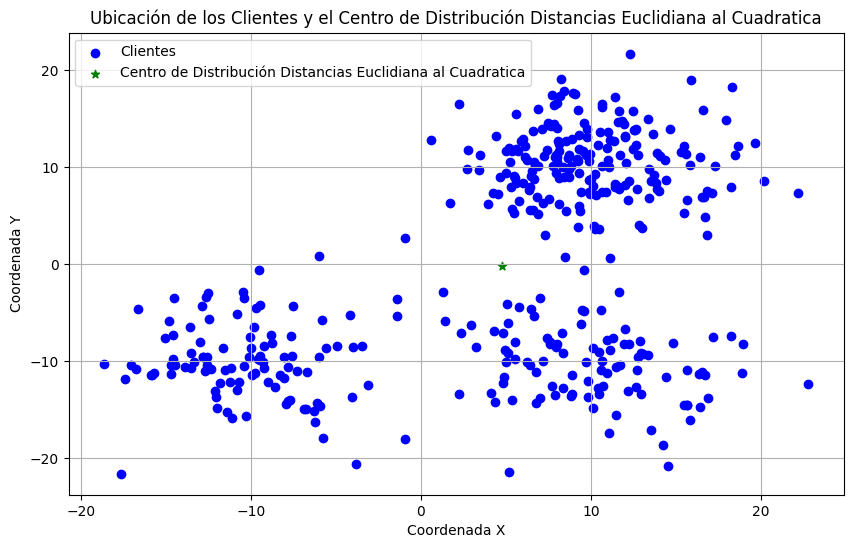

In [62]:
# Graficar los clientes y la ubicación óptima del CD con distancia Euclidiana al Cuadrado
plt.figure(figsize=(10, 6))
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')
plt.scatter(x_e, y_e, color='green', marker='*', label='Centro de Distribución Distancias Euclidiana al Cuadratica')
plt.title('Ubicación de los Clientes y el Centro de Distribución Distancias Euclidiana al Cuadratica')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

**Distancia Rectilinea**

Como en el DataFrame los datos tienen pesos distintos se procede de la siguiente forma:

1. Se ordenan las coordenadas de menor a mayor, considerando la primera componente.
2. Se determina el peso total, dado por la suma de los pesos.
3. Se determina para cada elemento el peso ponderado, multiplicando la componente elegida por el peso asociado.
4. Se calcula el peso ponderado, considerando el orden establecido.
5. El valor óptimo corresponde a la ubicación en donde se ha alcanzado la mitad del peso total.

In [63]:
# Orden de los clientes por la coordenada 'x' de menor a mayor
clientes_ordenados = clientes.sort_values('x')

# Calculo  del peso total
peso_total = clientes_ordenados['peso'].sum()

# Calcula el peso acumulado para cada cliente
clientes_ordenados['Peso Acumulado'] = clientes_ordenados['peso'].cumsum()

# Encuentra el punto donde el peso acumulado supera la mitad del peso total
mediana_x = clientes_ordenados[clientes_ordenados['Peso Acumulado'] >= peso_total / 2].iloc[0]

# Repite el proceso para la coordenada 'Y'
clientes_ordenados = clientes.sort_values('y')
clientes_ordenados['Peso Acumulado'] = clientes_ordenados['peso'].cumsum()
mediana_y = clientes_ordenados[clientes_ordenados['Peso Acumulado'] >= peso_total / 2].iloc[0]

# Imprime las coordenadas óptimas
print(f"La ubicación óptima del centro de distribución es con Distancia Rectilínea: (X: {mediana_x['x']}, Y: {mediana_y['y']})")


La ubicación óptima del centro de distribución es con Distancia Rectilínea: (X: 7.9839, Y: -3.4306)


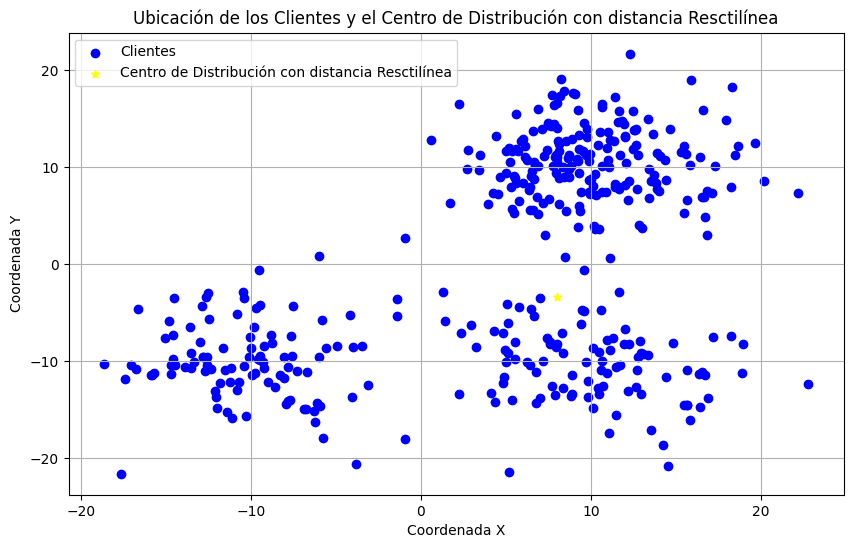

In [64]:
# Graficar los clientes y la ubicación óptima del CD
plt.figure(figsize=(10, 6))
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')
plt.scatter(mediana_x['x'], mediana_y['y'], color='yellow', marker='*', label='Centro de Distribución con distancia Resctilínea')
plt.title('Ubicación de los Clientes y el Centro de Distribución con distancia Resctilínea')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

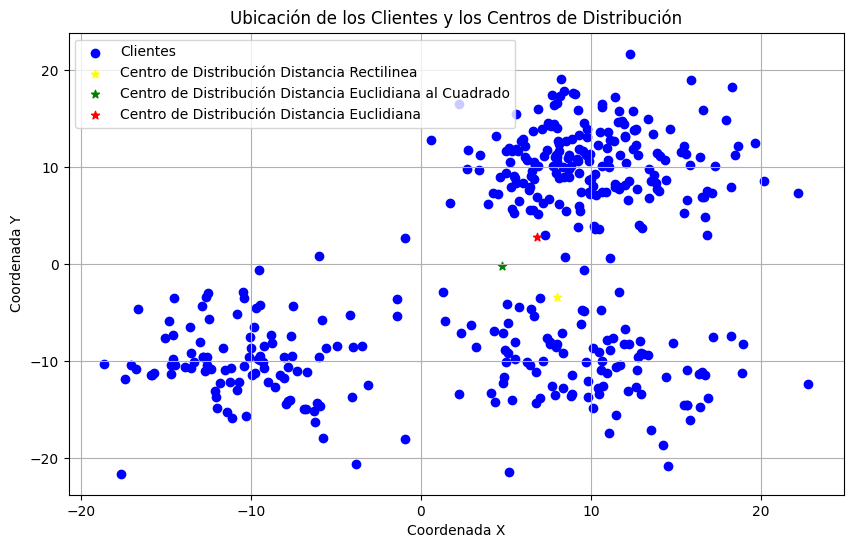

In [65]:
# Graficar los clientes y la ubicación óptima de los CD
plt.figure(figsize=(10, 6))
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')
plt.scatter(mediana_x['x'], mediana_y['y'], color='yellow', marker='*', label='Centro de Distribución Distancia Rectilinea')
plt.scatter(x_e, y_e, color='green', marker='*', label='Centro de Distribución Distancia Euclidiana al Cuadrado')
plt.scatter(x, y, color='red', marker='*', label='Centro de Distribución Distancia Euclidiana')
plt.title('Ubicación de los Clientes y los Centros de Distribución')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

# Pregunta 1b

(10 pts) Cerca de la solución propuesta con distancia cuadrática en la letra anterior hay una reserva natural donde se prohíben instalar cualquier tipo de instalaciones logísticas. La reserva está ubicada en el bloque X[-1,11], Y[-5,10] (imagine la reserva como un rectángulo con esas coordenadas). ¿Como ajustaría la solución para que el CD propuesto respete esa restricción y siga minimizando la distancia cuadrática total recorrida para atender? Reporte el código y el ajuste en la solución.


In [66]:
from gurobipy import Model, GRB, quicksum

# Crear el modelo
m = Model('Optimizacion_Centro_Distribucion')
# Configurar el modelo para no imprimir la información del proceso de optimización
m.setParam('OutputFlag', 0)

# Definir variables de decisión
x_c = m.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="x_c")
y_c = m.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="y_c")

# Variables binarias para las restricciones de la zona excluida
xr1 = m.addVar(vtype=GRB.BINARY, name="xr1")  # 1 si x_c <= -1
xr2 = m.addVar(vtype=GRB.BINARY, name="xr2")  # 1 si x_c >= 11
yr1 = m.addVar(vtype=GRB.BINARY, name="yr1")  # 1 si y_c <= -5
yr2 = m.addVar(vtype=GRB.BINARY, name="yr2")  # 1 si y_c >= 10

# Añadir restricciones para excluir la zona definida por los límites
m.addConstr(xr1 + xr2 >= 1, "exclusion_x")  # Al menos una restricción de x debe ser verdadera
m.addConstr(yr1 + yr2 >= 1, "exclusion_y")  # Al menos una restricción de y debe ser verdadera
m.addConstr((xr1 == 1) >> (x_c <= -1))
m.addConstr((xr2 == 1) >> (x_c >= 11))
m.addConstr((yr1 == 1) >> (y_c <= -5))
m.addConstr((yr2 == 1) >> (y_c >= 10))

# Función Objetivo
obj = quicksum(clientes['peso'][i] * ((clientes['x'][i] - x_c)**2 + (clientes['y'][i] - y_c)**2)
               for i in clientes.index)
m.setObjective(obj, GRB.MINIMIZE)

# Optimizar el modelo
m.optimize()

# Imprimir la solución
try:
    print('Funcion objetivo: ', str(round(m.ObjVal,2)))
    for v in m.getVars():
        print(str(v.VarName)+'='+str(round(v.x,2)))
except:
    print('Infactible')


Funcion objetivo:  110640115.31
x_c=-1.0
y_c=-5.0
xr1=1.0
xr2=0.0
yr1=1.0
yr2=0.0


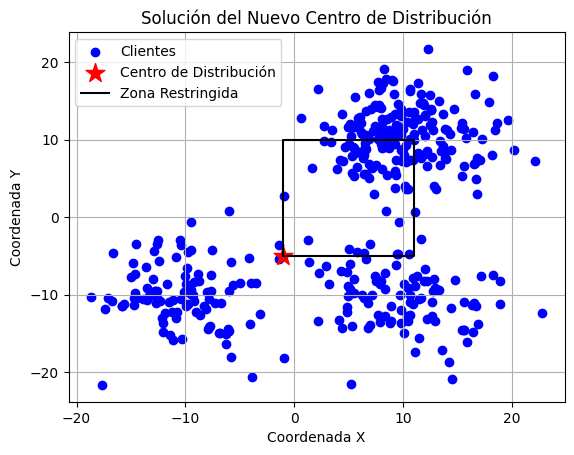

In [67]:
import matplotlib.pyplot as plt

# Extraer las coordenadas del centro de distribución óptimo
x_centro = x_c.X
y_centro = y_c.X

# Graficar los clientes
plt.scatter(clientes['x'], clientes['y'], c='blue', label='Clientes')

# Graficar el centro de distribución óptimo
plt.scatter(x_centro, y_centro, c='red', marker='*', s=200, label='Centro de Distribución')

# Graficar el cuadrado de la zona restringida
plt.plot([-1, -1, 11, 11, -1], [-5, 10, 10, -5, -5], 'k-', label='Zona Restringida')

# Configuraciones adicionales del gráfico
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.title('Solución del Nuevo Centro de Distribución')
plt.show()


# Problema 2: Localizacion multiples CD y asignaciones

Dado el éxito de la operación la tienda está evaluando instalar más de un centro de distribución. Para ello ha evaluado una lista de varias ubicaciones disponibles en el archivo cd.csv https://tinyurl.com/yvdrt7xp . Además, 1 km recorrido equivale a 1$. Cada ubicación puede abrir un centro con las siguientes capacidades y costos:

| Centro Distribución | Costo | Capacidad de Atención en clientes |
|---------------------|-------|-----------------------------------|
| Chico               | 25    | 50                                |
| Mediano             | 50    | 100                               |
| Grande              | 100   | 250                               |

a) (10 pts) Con la información señalada, defina donde instalar dos centros de distribución de tamaño grande, para minimizar la distancia recorrida hacia los clientes, ponderado por su importancia. Reporte la selección de las ubicaciones, así como la asignación de cada cliente a cada centro.

b) (10 pts) Relaje la restricción de dos centros y encuentre la cantidad óptima de centros de distribución, así como su tamaño óptimo (chico, mediano o grande) de modo de minimizar conjuntamente costos de transporte e instalación de CD’s. Reporte la selección de las ubicaciones, los tamaños escogidos, así como la asignación de cada cliente a cada centro. ¿Porcentualmente, cuanto ahorro de costos hay con respecto a la solución de la parte a)?

In [68]:
#Pregunta 2a
cd_df = pd.read_csv('cd.csv')
cd_df.head()

,x,y
0,6.2562,10.7460
1,-12.5283,-2.9782
2,20.1960,8.6045
3,5.5140,-8.0327
4,-10.8213,-13.0088


In [69]:
clientes
X = clientes['x']
Y = clientes['y']
importancia = clientes['peso']
xcd = cd_df['x']
ycd = cd_df['y']

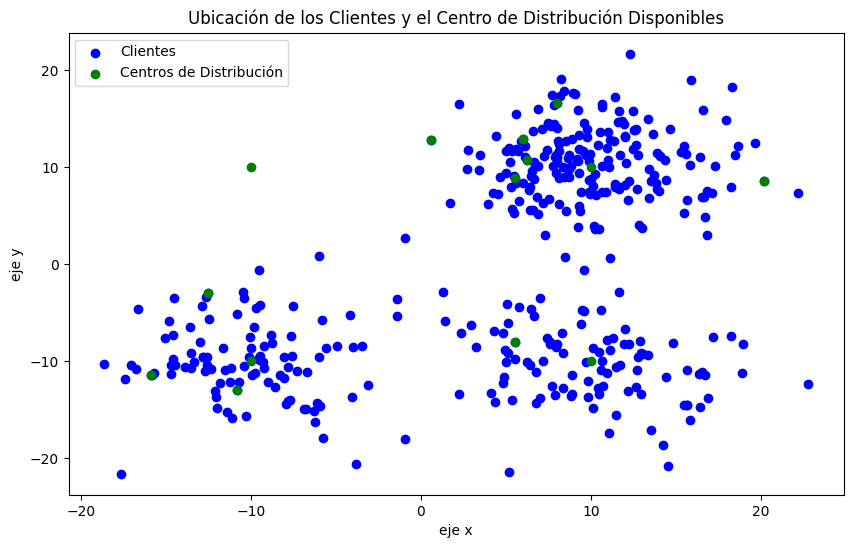

In [70]:
#Graficamos los clientes y todas las ubicaciones de los posibles centros de distribución
plt.figure(figsize=(10, 6))
plt.scatter(X,Y, color = 'blue', label='Clientes')
plt.scatter(xcd,ycd, color = 'green', label='Centros de Distribución')
plt.legend()
plt.title('Ubicación de los Clientes y el Centro de Distribución Disponibles')
plt.xlabel("eje x")
plt.ylabel("eje y")
plt.show()

## Modelo de optimización para la Pregunta 2a
### Conjuntos:
- $I$: conjunto de clientes.
- $J$: conjunto de posibles ubicaciones para los centros de distribución.

### Parámetros:
- $d_{ij}$: distancia entre el cliente $i$ y la ubicación $j$.
- $w_i$: importancia o peso del cliente $i$.
- $C$: capacidad de un centro de distribución de tamaño grande.
- $M$: un número grande.

### Variables de decisión:
- $x_{ij}$: variable binaria que toma el valor 1 si el cliente $i$ es asignado al centro de distribución en la ubicación $j$, y 0 de lo contrario.
- $y_j$: variable binaria que toma el valor 1 si se instala un centro de distribución en la ubicación $j$, y 0 de lo contrario.
- $z$: número de centros de distribución instalados (en este caso, $z = 2$).

### Modelo de optimización:

**Minimizar:**
$$ \sum_{i \in I} \sum_{j \in J} w_i \cdot d_{ij} \cdot x_{ij} $$

**Sujeto a:**
1. Cada cliente debe ser asignado a exactamente un centro de distribución:
   $$ \sum_{j \in J} x_{ij} = 1 \quad \forall i \in I $$
2. El número de clientes asignados a un centro de distribución no debe exceder su capacidad:
   $$ \sum_{i \in I} x_{ij} \leq C \cdot y_j \quad \forall j \in J $$
3. Se deben instalar exactamente dos centros de distribución:
   $$ \sum_{j \in J} y_j = z $$
4. Las variables $x_{ij}$ y $y_j$ son binarias:
   $$ x_{ij} \in \{0, 1\} \quad \forall i \in I, \forall j \in J $$
   $$ y_j \in \{0, 1\} \quad \forall j \in J $$



In [90]:
# Parámetros
# Distancia euclidiana
distancias = {(i, j): ((clientes.loc[i, 'x'] - cd_df.loc[j, 'x'])**2 + 
                       (clientes.loc[i, 'y'] - cd_df.loc[j, 'y'])**2)**0.5 
              for i in clientes.index for j in cd_df.index}
importancias = clientes['peso'].to_dict()

# Parámetros de capacidad y cantidad de centros de distribución.
capacidad = 250
num_centros = 2

# Crear el modelo de optimización
m = gp.Model("localizacion_cd")

# Configurar el modelo para no imprimir la información del proceso de optimización
m.setParam('OutputFlag', 0)

# Variables de decisión
x = m.addVars(clientes.index, cd_df.index, vtype=GRB.BINARY, name="x")
y = m.addVars(cd_df.index, vtype=GRB.BINARY, name="y")

# Función objetivo: minimizar la distancia total ponderada
m.setObjective(gp.quicksum(importancias[i] * distancias[i, j] * x[i, j] 
                           for i in clientes.index for j in cd_df.index), GRB.MINIMIZE)

# Restricciones
# Cada cliente debe ser asignado a exactamente un centro de distribución
m.addConstrs((x.sum(i, '*') == 1 for i in clientes.index), name="asignacion_cliente")

# El número de clientes asignados a un centro de distribución no debe exceder su capacidad
m.addConstrs((x.sum('*', j) <= capacidad * y[j] for j in cd_df.index), name="capacidad_cd")

# Se deben instalar exactamente dos centros de distribución
m.addConstr(y.sum('*') == num_centros, name="num_centros")

# Resolver el modelo
m.optimize()

# Verificar si el modelo fue resuelto con éxito y mostrar la solución
if m.status == GRB.OPTIMAL:
    print("Ubicaciones seleccionadas para los centros de distribución:")
    for j in cd_df.index:
        if y[j].X > 0.5:
            print(f"Ubicación {j} seleccionada con coordenadas (x={cd_df.loc[j, 'x']}, y={cd_df.loc[j, 'y']})")
    print("\nAsignación de clientes a centros de distribución:")
    for i in clientes.index:
        for j in cd_df.index:
            if x[i, j].X > 0.5:
                print(f"Cliente {i} asignado al centro de distribución en ubicación {j}")
else:
    print("No se encontró una solución óptima.")


Ubicaciones seleccionadas para los centros de distribución:
Ubicación 0 seleccionada con coordenadas (x=5.514, y=-8.0327)
Ubicación 1 seleccionada con coordenadas (x=10.0, y=10.0)

Asignación de clientes a centros de distribución:
Cliente 0 asignado al centro de distribución en ubicación 1
Cliente 1 asignado al centro de distribución en ubicación 1
Cliente 2 asignado al centro de distribución en ubicación 1
Cliente 3 asignado al centro de distribución en ubicación 1
Cliente 4 asignado al centro de distribución en ubicación 1
Cliente 5 asignado al centro de distribución en ubicación 1
Cliente 6 asignado al centro de distribución en ubicación 1
Cliente 7 asignado al centro de distribución en ubicación 1
Cliente 8 asignado al centro de distribución en ubicación 1
Cliente 9 asignado al centro de distribución en ubicación 1
Cliente 10 asignado al centro de distribución en ubicación 1
Cliente 11 asignado al centro de distribución en ubicación 1
Cliente 12 asignado al centro de distribución e

In [91]:
# Imprimir la solución
try:
    print('Funcion objetivo: ', str(round(m.ObjVal,2)))
    for v in m.getVars():
        print(str(v.VarName)+'='+str(round(v.x,2)))
except:
    print('Infactible')

Funcion objetivo:  3389094.23
x[0,0]=0.0
x[0,1]=1.0
x[1,0]=0.0
x[1,1]=1.0
x[2,0]=0.0
x[2,1]=1.0
x[3,0]=0.0
x[3,1]=1.0
x[4,0]=0.0
x[4,1]=1.0
x[5,0]=0.0
x[5,1]=1.0
x[6,0]=0.0
x[6,1]=1.0
x[7,0]=0.0
x[7,1]=1.0
x[8,0]=0.0
x[8,1]=1.0
x[9,0]=0.0
x[9,1]=1.0
x[10,0]=0.0
x[10,1]=1.0
x[11,0]=0.0
x[11,1]=1.0
x[12,0]=0.0
x[12,1]=1.0
x[13,0]=0.0
x[13,1]=1.0
x[14,0]=0.0
x[14,1]=1.0
x[15,0]=0.0
x[15,1]=1.0
x[16,0]=0.0
x[16,1]=1.0
x[17,0]=0.0
x[17,1]=1.0
x[18,0]=0.0
x[18,1]=1.0
x[19,0]=0.0
x[19,1]=1.0
x[20,0]=0.0
x[20,1]=1.0
x[21,0]=0.0
x[21,1]=1.0
x[22,0]=0.0
x[22,1]=1.0
x[23,0]=0.0
x[23,1]=1.0
x[24,0]=0.0
x[24,1]=1.0
x[25,0]=0.0
x[25,1]=1.0
x[26,0]=0.0
x[26,1]=1.0
x[27,0]=0.0
x[27,1]=1.0
x[28,0]=0.0
x[28,1]=1.0
x[29,0]=0.0
x[29,1]=1.0
x[30,0]=0.0
x[30,1]=1.0
x[31,0]=0.0
x[31,1]=1.0
x[32,0]=0.0
x[32,1]=1.0
x[33,0]=0.0
x[33,1]=1.0
x[34,0]=0.0
x[34,1]=1.0
x[35,0]=0.0
x[35,1]=1.0
x[36,0]=1.0
x[36,1]=0.0
x[37,0]=0.0
x[37,1]=1.0
x[38,0]=0.0
x[38,1]=1.0
x[39,0]=0.0
x[39,1]=1.0
x[40,0]=0.0
x[40,1]=1.0
x[41,0

In [72]:
# Resolver el modelo
m.optimize()

# Verificar si el modelo fue resuelto con éxito y mostrar la solución resumida
if m.status == GRB.OPTIMAL:
    print("Cantidad de clientes asignados a cada centro de distribución:")
    for j in cd_df.index:
        if y[j].X > 0.5:  # Si el centro de distribución en la ubicación 'j' está abierto
            clientes_asignados = sum(x[i, j].X for i in clientes.index)
            print(f"En la ubicación (x={cd_df.loc[j, 'x']}, y={cd_df.loc[j, 'y']}) hay {clientes_asignados} clientes.")
else:
    print("No se encontró una solución óptima.")


Cantidad de clientes asignados a cada centro de distribución:
En la ubicación (x=5.514, y=-8.0327) hay 205.0 clientes.
En la ubicación (x=10.0, y=10.0) hay 195.0 clientes.


In [74]:
# Función para calcular la distancia total
def calcular_distancia_total(clientes, rangos_clientes, punto):
    distancias = []
    for rango in rangos_clientes:
        # Extraer las coordenadas de los clientes especificados
        if isinstance(rango, int):
            coords_clientes = clientes[['x', 'y']].iloc[rango:rango+1]
        else:
            coords_clientes = clientes[['x', 'y']].iloc[rango[0]:rango[1]+1]

        # Calcular las distancias euclidianas y sumarlas
        distancia_rango = np.sqrt((coords_clientes['x'] - punto[0])**2 + (coords_clientes['y'] - punto[1])**2).sum()
        distancias.append(distancia_rango)

    return sum(distancias)

# Definir el punto y los rangos de clientes
punto10 = (10, 10)
punto3 = (5.514, -8.0327)
rangos_clientes10 = [(0, 35), (37, 149), (151, 179), (182, 190), (192, 199)]
rangos_clientes3 = [36, 150, (180, 181), 191, (200, 399)]

# Calcular la distancia total
distancia_total10 = calcular_distancia_total(clientes, rangos_clientes10, punto10)
print('La distancia total que recorren todos los clientes hacia el CD de ubicación (10,10) es de:', distancia_total10)

# Calcular la distancia total
distancia_total3 = calcular_distancia_total(clientes, rangos_clientes3, punto3)
print('La distancia total que recorren todos los clientes hacia el CD de ubicación (5.514, -8.0327) es de:', distancia_total3)


La distancia total que recorren todos los clientes hacia el CD de ubicación (10,10) es de: 935.3443565475657
La distancia total que recorren todos los clientes hacia el CD de ubicación (5.514, -8.0327) es de: 2363.9068516632474


In [75]:
#Costos de la implementacion de dos centros grandes
costos = 200 + distancia_total3 + distancia_total10
print('Costos de dos centros de distribucion grandes es de: ', costos)

Costos de dos centros de distribucion grandes es de:  3499.2512082108133


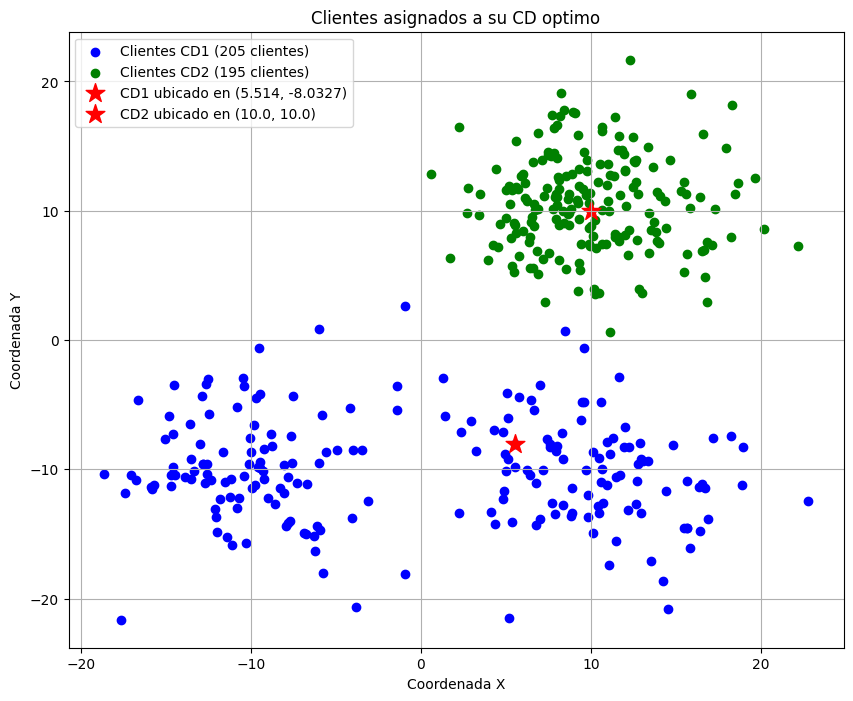

In [76]:
#Grafico de clientes asignados a su CD más cercano

# Primero, actualizaremos la ubicación de los CDs a los valores proporcionados.
cd_df = pd.DataFrame({
    'x': [5.514, 10],
    'y': [-8.0327, 10]
})

# Ahora, asignaremos clientes a los CDs basados en la proximidad.
# Esto es una simplificación y solo se utiliza para la visualización.
clientes['cd_asignado'] = clientes.apply(lambda row: np.argmin(
    [(row['x'] - cd_df.loc[0, 'x'])**2 + (row['y'] - cd_df.loc[0, 'y'])**2,
     (row['x'] - cd_df.loc[1, 'x'])**2 + (row['y'] - cd_df.loc[1, 'y'])**2]), axis=1)

# Crear el gráfico
plt.figure(figsize=(10, 8))

# Graficar los clientes asignados a cada CD
colores = ['blue', 'green']  # Colores para cada grupo de clientes
for i, cd in cd_df.iterrows():
    clientes_cd = clientes[clientes['cd_asignado'] == i]
    plt.scatter(clientes_cd['x'], clientes_cd['y'], c=colores[i], label=f'Clientes CD{i+1} ({len(clientes_cd)} clientes)')

# Graficar los centros de distribución
for i, cd in cd_df.iterrows():
    plt.scatter(cd['x'], cd['y'], c='red', marker='*', s=200, label=f'CD{i+1} ubicado en ({cd["x"]}, {cd["y"]})')

# Títulos y leyendas
plt.title('Clientes asignados a su CD optimo')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


### Problema 2b

b) (10 pts) Relaje la restricción de dos centros y encuentre la cantidad óptima de centros de distribución, así como su tamaño óptimo (chico, mediano o grande) de modo de minimizar conjuntamente costos de transporte e instalación de CD’s. Reporte la selección de las ubicaciones, los tamaños escogidos, así como la asignación de cada cliente a cada centro. ¿Porcentualmente, cuanto ahorro de costos hay con respecto a la solución de la parte a)?

## Modelo de Optimización para la Ubicación y Tamaño de Centros de Distribución

### Objetivo

Minimizar los costos totales de transporte e instalación de los centros de distribución (CD), considerando las ubicaciones de los clientes y las posibles ubicaciones para los CD.

### Variables de Decisión

- $x_{ijk}$: Variable binaria que indica si el cliente $i$ está asignado al centro de distribución $j$ de tamaño $k$. (1 si es así, 0 en caso contrario)
- $y_{jk}$: Variable binaria que indica si se establece un centro de distribución de tamaño $k$ en la ubicación $j$. (1 si es así, 0 en caso contrario)

### Parámetros

- $Costo\_Instalacion_k$: Costo de instalación para un centro de distribución del tamaño $k$.
- $Distancia_{ij}$: Distancia entre el cliente $i$ y la ubicación del centro de distribución $j$.
- $Capacidad_k$: Capacidad de atención (número máximo de clientes) para un centro de distribución del tamaño $k$.

### Función Objetivo

Minimizar la suma de los costos de instalación de los CD seleccionados y los costos de transporte para asignar los clientes a estos CD.

$$
\text{Minimizar } Z = \sum_{j,k} (Costo\_Instalacion_k \times y_{jk}) + \sum_{i,j,k} (Distancia_{ij} \times x_{ijk})
$$

### Restricciones

1. **Asignación de Clientes**: Cada cliente debe ser asignado a exactamente un CD.

   $$
   \sum_{j,k} x_{ijk} = 1 \quad \forall i
   $$

2. **Capacidad de los CD**: La suma de los clientes asignados a un CD no puede exceder su capacidad.

   $$
   \sum_{i} x_{ijk} \leq Capacidad_k \times y_{jk} \quad \forall j, k
   $$

3. **Selección de Tamaño de CD**: Si un CD se establece en una ubicación, solo puede tener un tamaño.

   $$
   \sum_{k} y_{jk} \leq 1 \quad \forall j


In [77]:
from gurobipy import Model, GRB, quicksum
from itertools import product
import pandas as pd
from scipy.spatial.distance import cdist

# Cargamos los datos
clientes = pd.read_csv('clientes1.csv')
cd = pd.read_csv('cd.csv')

# Calcular las distancias
distancias = cdist(clientes[['x', 'y']].values, cd[['x', 'y']].values)
for j in range(distancias.shape[1]):
    clientes[f'distancia_{j}'] = distancias[:, j]

# Parámetros del modelo: costos de instalación y capacidades de los CDs
installation_costs = {0: 25, 1: 50, 2: 100}  # Costos para CD pequeño, mediano y grande
capacities = {0: 50, 1: 100, 2: 250}  # Capacidades para CD pequeño, mediano y grande

# Inicialización del modelo
m = Model("Minimize_Costs")
# Configurar el modelo para no imprimir la información del proceso de optimización
m.setParam('OutputFlag', 0)

# Variables de decisión
assign_vars = m.addVars(clientes.index, cd.index, [0, 1, 2], vtype=GRB.BINARY, name="assign")
cd_vars = m.addVars(cd.index, [0, 1, 2], vtype=GRB.BINARY, name="cd")

# Función objetivo
m.setObjective(
    quicksum(cd_vars[j, k] * installation_costs[k] for j, k in cd_vars.keys()) +
    quicksum(assign_vars[i, j, k] * clientes.at[i, f'distancia_{j}'] for i, j, k in assign_vars.keys()),
    GRB.MINIMIZE
)

# Restricciones
# Cada cliente asignado a un solo CD
for i in clientes.index:
    m.addConstr(quicksum(assign_vars[i, j, k] for j, k in product(cd.index, [0, 1, 2])) == 1)

# La capacidad de los CDs no puede ser excedida
for j, k in product(cd.index, [0, 1, 2]):
    m.addConstr(quicksum(assign_vars[i, j, k] for i in clientes.index) <= cd_vars[j, k] * capacities[k])

# Un CD solo puede tener un tamaño
for j in cd.index:
    m.addConstr(quicksum(cd_vars[j, k] for k in [0, 1, 2]) <= 1)

# Optimización
m.optimize()

# Extracción de resultados
if m.status == GRB.OPTIMAL:
    assignment_solution = m.getAttr('x', assign_vars)
    cd_solution = m.getAttr('x', cd_vars)
    # Procesamiento de las soluciones 
    for i, j, k in assign_vars.keys():
        if assignment_solution[i, j, k] > 0.5:  # Umbral para decidir si el cliente i es atendido por CD j de tamaño k
            print(f"Cliente {i} asignado a CD {j} de tamaño {['pequeño', 'mediano', 'grande'][k]}")

    for j, k in cd_vars.keys():
        if cd_solution[j, k] > 0.5:  # Umbral para decidir si se instala un CD en ubicación j de tamaño k
            print(f"CD instalado en ubicación {j} de tamaño {['pequeño', 'mediano', 'grande'][k]}")


Cliente 0 asignado a CD 7 de tamaño pequeño
Cliente 1 asignado a CD 10 de tamaño mediano
Cliente 2 asignado a CD 10 de tamaño mediano
Cliente 3 asignado a CD 7 de tamaño pequeño
Cliente 4 asignado a CD 10 de tamaño mediano
Cliente 5 asignado a CD 10 de tamaño mediano
Cliente 6 asignado a CD 9 de tamaño pequeño
Cliente 7 asignado a CD 9 de tamaño pequeño
Cliente 8 asignado a CD 10 de tamaño mediano
Cliente 9 asignado a CD 6 de tamaño pequeño
Cliente 10 asignado a CD 7 de tamaño pequeño
Cliente 11 asignado a CD 6 de tamaño pequeño
Cliente 12 asignado a CD 9 de tamaño pequeño
Cliente 13 asignado a CD 10 de tamaño mediano
Cliente 14 asignado a CD 10 de tamaño mediano
Cliente 15 asignado a CD 10 de tamaño mediano
Cliente 16 asignado a CD 10 de tamaño mediano
Cliente 17 asignado a CD 6 de tamaño pequeño
Cliente 18 asignado a CD 6 de tamaño pequeño
Cliente 19 asignado a CD 2 de tamaño pequeño
Cliente 20 asignado a CD 10 de tamaño mediano
Cliente 21 asignado a CD 7 de tamaño pequeño
Cliente 22

In [78]:
# Imprimir la solución
try:
    print('Funcion objetivo: ', str(round(m.ObjVal,2)))
    for v in m.getVars():
        print(str(v.VarName)+'='+str(round(v.x,2)))
except:
    print('Infactible')

Funcion objetivo:  1666.19
assign[0,0,0]=0.0
assign[0,0,1]=0.0
assign[0,0,2]=0.0
assign[0,1,0]=-0.0
assign[0,1,1]=-0.0
assign[0,1,2]=-0.0
assign[0,2,0]=-0.0
assign[0,2,1]=-0.0
assign[0,2,2]=-0.0
assign[0,3,0]=-0.0
assign[0,3,1]=-0.0
assign[0,3,2]=-0.0
assign[0,4,0]=-0.0
assign[0,4,1]=-0.0
assign[0,4,2]=-0.0
assign[0,5,0]=-0.0
assign[0,5,1]=-0.0
assign[0,5,2]=-0.0
assign[0,6,0]=-0.0
assign[0,6,1]=-0.0
assign[0,6,2]=-0.0
assign[0,7,0]=1.0
assign[0,7,1]=0.0
assign[0,7,2]=0.0
assign[0,8,0]=-0.0
assign[0,8,1]=-0.0
assign[0,8,2]=-0.0
assign[0,9,0]=-0.0
assign[0,9,1]=-0.0
assign[0,9,2]=-0.0
assign[0,10,0]=-0.0
assign[0,10,1]=-0.0
assign[0,10,2]=-0.0
assign[0,11,0]=-0.0
assign[0,11,1]=-0.0
assign[0,11,2]=-0.0
assign[0,12,0]=-0.0
assign[0,12,1]=-0.0
assign[0,12,2]=-0.0
assign[0,13,0]=-0.0
assign[0,13,1]=-0.0
assign[0,13,2]=-0.0
assign[1,0,0]=-0.0
assign[1,0,1]=-0.0
assign[1,0,2]=-0.0
assign[1,1,0]=-0.0
assign[1,1,1]=-0.0
assign[1,1,2]=-0.0
assign[1,2,0]=-0.0
assign[1,2,1]=-0.0
assign[1,2,2]=-0.

In [79]:
# Diccionario para almacenar la información de los CD seleccionados
cd_info = {}

# Iterar sobre las soluciones de los CD para identificar los CD seleccionados y su tamaño
for j, k in cd_vars.keys():
    if cd_solution[j, k] > 0.5:  # Si el CD en la ubicación j de tamaño k está seleccionado
        cd_info[j] = {'tamaño': ['pequeño', 'mediano', 'grande'][k], 'clientes': 0}

# Iterar sobre las soluciones de asignación para contar los clientes asignados a cada CD
for i, j, k in assign_vars.keys():
    if assignment_solution[i, j, k] > 0.5:  # Si el cliente i está asignado al CD en la ubicación j de tamaño k
        cd_info[j]['clientes'] += 1

# Imprimir la información de los CD seleccionados
for j, info in cd_info.items():
    print(f"CD en la ubicación {j} ({cd.at[j, 'x']}, {cd.at[j, 'y']}), Tamaño: {info['tamaño']}, Clientes asignados: {info['clientes']}")


CD en la ubicación 1 (-12.5283, -2.9782), Tamaño: pequeño, Clientes asignados: 16
CD en la ubicación 2 (20.196, 8.6045), Tamaño: pequeño, Clientes asignados: 21
CD en la ubicación 3 (5.514, -8.0327), Tamaño: pequeño, Clientes asignados: 39
CD en la ubicación 4 (-10.8213, -13.0088), Tamaño: pequeño, Clientes asignados: 26
CD en la ubicación 5 (-15.8588, -11.4011), Tamaño: pequeño, Clientes asignados: 18
CD en la ubicación 6 (5.5049, 8.8979), Tamaño: pequeño, Clientes asignados: 37
CD en la ubicación 7 (6.0226, 12.8756), Tamaño: pequeño, Clientes asignados: 30
CD en la ubicación 9 (8.0177, 16.6242), Tamaño: pequeño, Clientes asignados: 24
CD en la ubicación 10 (10.0, 10.0), Tamaño: mediano, Clientes asignados: 85
CD en la ubicación 11 (10.0, -10.0), Tamaño: mediano, Clientes asignados: 64
CD en la ubicación 12 (-10.0, -10.0), Tamaño: pequeño, Clientes asignados: 40


In [80]:
# Contadores para cada tamaño de centro de distribución
cd_count = {'pequeño': 0, 'mediano': 0, 'grande': 0}

# Iterar sobre los centros de distribución seleccionados para contarlos por tamaño
for info in cd_info.values():
    cd_count[info['tamaño']] += 1

# Imprimir la cantidad de centros de distribución por tamaño
print(f"Centros pequeños: {cd_count['pequeño']}")
print(f"Centros medianos: {cd_count['mediano']}")
print(f"Centros grandes: {cd_count['grande']}")


Centros pequeños: 9
Centros medianos: 2
Centros grandes: 0


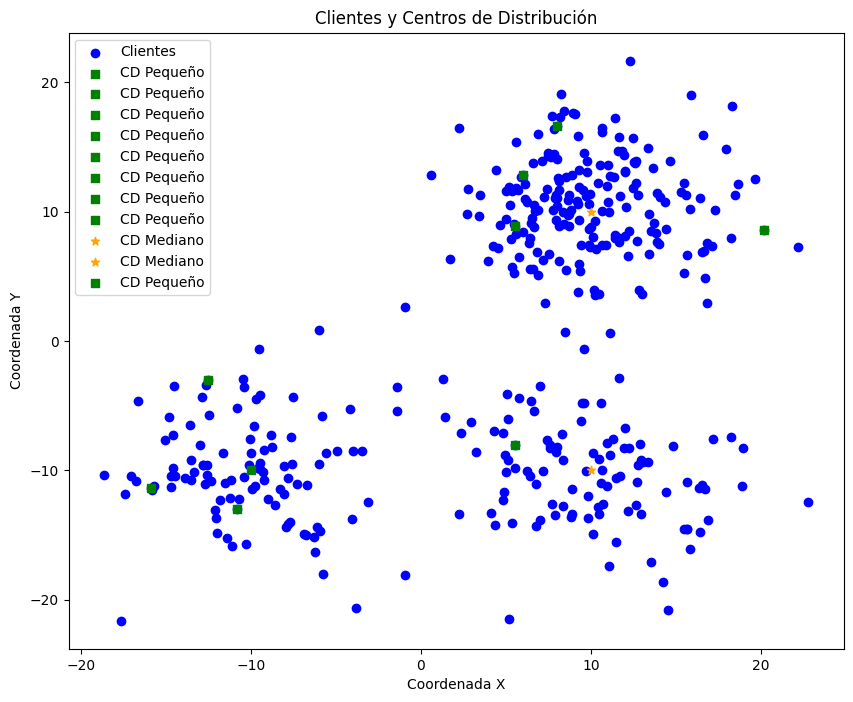

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
# Graficar los clientes
plt.scatter(clientes['x'], clientes['y'], c='blue', label='Clientes')

# Graficar los centros de distribución seleccionados
for j, info in cd_info.items():
    if info['clientes'] > 0:  # Si el centro de distribución tiene clientes asignados
        if info['tamaño'] == 'pequeño':
            marker = 's'  # Círculo para centros pequeños
            c = 'green'
        elif info['tamaño'] == 'mediano':
            marker = '*'  # Cuadrado para centros medianos
            c = 'orange'
        else:
            marker = 'D'  # Diamante para centros grandes
            c = 'red'
        plt.scatter(cd.at[j, 'x'], cd.at[j, 'y'], c=c, marker=marker, label=f"CD {info['tamaño'].capitalize()}")

# Configurar la gráfica
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Clientes y Centros de Distribución')
plt.legend()

# Mostrar la gráfica
plt.show()


In [82]:
# Obtener el valor de la función objetivo
gasto_total = m.getObjective().getValue()

# Imprimir el gasto total
print(f"costo total: {gasto_total}")


costo total: 1666.189249544626


### ¿Porcentualmente, cuanto ahorro de costos hay con respecto a la solución de la parte a)?

In [83]:
#ahorro en costos
porcentaje = 100 - ((gasto_total*100)/costos)

print('Al usar más centros de distribucion se logra ahorrar un: ', porcentaje, '%','comparado a la pregunta 2a')

Al usar más centros de distribucion se logra ahorrar un:  52.38440596562492 % comparado a la pregunta 2a


# Problema 3. Asignación

Ud va a abrir un nuevo local de IKE-AKA, exitosa tienda europea de mejoramiento para el hogar en Chile. Debe decidir donde ubicar cada una de las 14 categorías dentro del layout de los 5000 mts2 disponibles. Su objetivo es maximizar la distancia que recorren los clientes por la tienda de modo de generar ventas cruzadas. Un modelo de machine learning estimó las demandas potenciales de las 14 categorías en 20 posibles ubicaciones (demandas.csv) https://tinyurl.com/mr2zvkka

a) (10 pts) Modele y resuelve el problema de asignación de categorías a ubicaciones de la tienda. Reporte el problema de optimización, asignación óptima y venta total estimada para los productos.

b) (10 pts) Otro modelo de machine learning ha medido la oportunidad de venta cruzada entre categorías. La matriz Jaccard-cross-category.csv refleja el % de transacciones que compra la categoría i, y que también compra la j. Además, la matriz Dist_unic.csv muestra la distancia existente entre la ubicación i y j. Usando esta información, vuelva resolver el problema de modo de maximizar la venta esperada incorporando además interacciones o efectos cruzados entre categorías. Datos disponibles en: https://shorturl.at/azMQT

### Pregunta 3a
### Modelo de optimización para la asignación de categorías a ubicaciones


**Conjuntos:**
- **I**: Conjunto de categorías, *i ∈ I*
- **J**: Conjunto de ubicaciones, *j ∈ J*

**Parámetros:**
- **d_{ij}**: Demanda potencial de la categoría *i* en la ubicación *j*

**Variables de decisión:**
- **x_{ij}**: Variable binaria que indica si la categoría *i* se asigna a la ubicación *j* (1 si se asigna, 0 en caso contrario)

**Función objetivo:**
- Maximizar la suma de las demandas potenciales de las categorías asignadas a cada ubicación:
  $$\max \sum_{i ∈ I} \sum_{j ∈ J} d_{ij} \cdot x_{ij}$$

**Restricciones:**
1. Cada categoría debe asignarse exactamente a una ubicación:
   $$\sum_{j ∈ J} x_{ij} = 1 \quad \forall i ∈ I$$

2. Cada ubicación puede tener a lo sumo una categoría asignada:
   $$\sum_{i ∈ I} x_{ij} \leq 1 \quad \forall j ∈ J$$

**Notas:**
- La función objetivo busca maximizar la suma de las demandas potenciales, lo que implica que se busca asignar cada categoría a la ubicación donde tiene la mayor demanda potencial, sujeta a las restricciones de que cada categoría debe estar en una única ubicación y cada ubicación puede tener a lo sumo una categoría.
- Este modelo no considera explícitamente las ventas cruzadas. Para incluir las ventas cruzadas, se necesitaría modificar la función objetivo para incorporar un término adicional que represente el beneficio de colocar ciertas categorías juntas.


In [84]:
from gurobipy import Model, GRB, quicksum

# Datos
categorias = [i for i in range(1, 15)]
ubicaciones = [j for j in range(1, 21)]
demandas = [
    [47.61687287, 45.46325486, 42.5949262, 51.21657646, 29.12410209, 37.99182032, 44.01657754, 36.57586523, 41.29740972, 44.04405159, 39.32655898, 44.93013796, 36.58427703, 40.5005242, 40.56642843, 39.47890101, 37.70202162, 27.36885063, 47.43346286, 36.83022027],
    [44.78697191, 43.7995378, 31.38775304, 42.42893924, 36.44766297, 41.14182567, 39.12557328, 35.68414674, 38.47925534, 47.66137184, 42.79666541, 34.93115983, 40.83271446, 39.95426923, 38.4380402, 36.13908088, 45.47212632, 41.95097211, 43.05660523, 35.20542498],
    [50.30284054, 35.51573315, 45.57681269, 44.62342152, 31.03551034, 41.64586663, 42.9721177, 40.04777282, 46.08289435, 48.64078127, 42.54371149, 37.77396276, 48.13596877, 39.43397599, 36.28310865, 39.6090332, 41.8577025, 51.12348093, 36.70281581, 25.90058763],
    [39.11460598, 32.57529413, 43.71832154, 40.39126816, 44.13490827, 34.29800274, 37.50898037, 32.01953126, 43.33353336, 38.37356425, 47.24598395, 49.40035358, 42.21230156, 38.03387755, 29.7500093, 31.96681103, 32.40747989, 34.54635894, 42.84968559, 39.02832975],
    [41.94975576, 46.88175228, 30.64876014, 34.02120047, 44.38735123, 43.03269347, 33.5622635, 47.09343873, 39.66232585, 28.62301411, 43.33302672, 39.68938392, 43.17242436, 35.91146719, 36.07160904, 35.74097079, 44.28204859, 46.79154651, 47.43479266, 38.07765233],
    [38.16974005, 47.44915088, 37.18480521, 45.90836564, 47.01298038, 47.88729628, 39.12787628, 30.14961935, 41.70017076, 35.95917447, 38.54572933, 46.23459684, 47.41521825, 30.76514278, 47.61342834, 39.46970562, 39.76719685, 41.66018856, 41.58390228, 33.67169022],
    [37.9778346, 40.18910075, 44.86517465, 37.09213274, 40.05684528, 36.5268052, 41.01298605, 38.06231905, 38.96399221, 33.82446399, 38.42392252, 41.56145768, 46.84903428, 42.29242663, 37.84317681, 49.16193835, 39.72946607, 44.7571295, 42.5699928, 51.72181658],
    [31.89301598, 38.10710682, 39.51961102, 42.98201445, 40.1345078, 51.50918548, 38.56639826, 38.46632671, 47.3443486, 36.43286367, 39.18431561, 29.84313218, 45.78732255, 40.78425984, 46.91419434, 41.19666632, 42.09941007, 44.91070066, 33.37769427, 39.17958784],
    [41.38151369, 41.41157764, 38.65041247, 35.76889734, 37.1474501, 42.51714106, 38.31233867, 38.32145135, 46.19377967, 50.54214519, 41.81718314, 39.00189863, 38.87543857, 39.5408054, 35.59079433, 45.61132391, 38.07844702, 40.74634416, 44.75294612, 33.45785814],
    [35.08220938, 43.49574532, 32.18702443, 38.612848, 35.01695891, 46.67576903, 39.33779759, 34.71537117, 37.32623386, 35.11500935, 44.33068172, 37.2244107, 35.39240667, 41.66146303, 37.36502589, 35.53075687, 38.39533161, 33.04319604, 31.57620702, 44.22663774],
    [42.52461511, 42.00398955, 38.61297279, 38.20908712, 38.76441874, 40.79551187, 42.99252936, 42.87049153, 49.19518956, 41.058137, 32.62932509, 31.86038541, 39.36256121, 41.87557535, 45.01503754, 29.00756568, 31.94215269, 37.6977514, 42.494567, 54.08526563],
    [35.84775201, 32.90680955, 36.84742199, 42.90271559, 39.06801611, 50.39106258, 44.24963972, 39.07720871, 38.31709108, 41.98150359, 40.7013107, 45.4286557, 38.68951001, 33.53263183, 36.67018856, 40.08726906, 40.39038478, 36.76956341, 54.97939283, 47.8949749],
    [40.18467927, 49.35332995, 37.79996253, 40.96200768, 48.37060779, 35.39783433, 45.10572169, 39.42584884, 41.95935369, 34.34976522, 33.71797804, 37.20296347, 43.61047943, 46.10224389, 32.46025887, 39.70994028, 38.90520265, 37.9591068, 43.3502401, 44.0830192],
    [42.55510708, 42.20401777, 30.22410213, 41.84636854, 39.31751872, 30.80842693, 42.06544294, 38.06709869, 40.13468215, 43.94165167, 44.52956419, 38.60715585, 41.37346687, 46.14849883, 40.15251575, 42.66712747, 37.12956754, 36.11306065, 38.87894521, 41.43732785]
]

# Modelo
modelo = Model("Asignacion_Tienda")

# Variables de decisión
x = modelo.addVars(categorias, ubicaciones, vtype=GRB.BINARY, name="Asignacion")

# Función objetivo
modelo.setObjective(quicksum(demandas[i - 1][j - 1] * x[i, j] for i in categorias for j in ubicaciones), GRB.MAXIMIZE)

# Restricciones
for j in ubicaciones:
    modelo.addConstr(quicksum(x[i, j] for i in categorias) <= 1, name=f"Max_Una_Categoria_{j}")

for i in categorias:
    modelo.addConstr(quicksum(x[i, j] for j in ubicaciones) == 1, name=f"Unica_Ubicacion_{i}")

modelo.setParam('OutputFlag', 0)

# Resolver
modelo.optimize()

# Mostrar la solución
if modelo.status == GRB.OPTIMAL:
    print("Asignaciones óptimas:")
    for i in categorias:
        for j in ubicaciones:
            if x[i, j].X > 0.5:
                print(f"Categoría {i} asignada a la ubicación {j}")
    print(f"Demanda total estimada: {modelo.ObjVal}")
else:
    print("No se encontró una solución óptima.")


Asignaciones óptimas:
Categoría 1 asignada a la ubicación 4
Categoría 2 asignada a la ubicación 17
Categoría 3 asignada a la ubicación 18
Categoría 4 asignada a la ubicación 12
Categoría 5 asignada a la ubicación 8
Categoría 6 asignada a la ubicación 15
Categoría 7 asignada a la ubicación 16
Categoría 8 asignada a la ubicación 6
Categoría 9 asignada a la ubicación 10
Categoría 10 asignada a la ubicación 11
Categoría 11 asignada a la ubicación 20
Categoría 12 asignada a la ubicación 19
Categoría 13 asignada a la ubicación 2
Categoría 14 asignada a la ubicación 14
Demanda total estimada: 692.02984234


In [85]:
from gurobipy import Model, GRB

demandas_df = demandas
# Nombres de las categorías
nombres_categorias = [
    "herramientas", "iluminación", "cocina", "baños", "muebles",
    "jardinería", "electricidad", "pintura", "construcción", "livings", "liquidación",
    "terrazas","oficina","climatizacion"
]

# Número de categorías y ubicaciones
num_categorias = len(demandas_df)
num_ubicaciones = len(demandas_df[0])

# Crear el modelo
m = Model("Asignacion_Categorias")

# Configurar el modelo para no imprimir la información del proceso de optimización
m.setParam('OutputFlag', 0)

# Variables de decisión
x = m.addVars(num_categorias, num_ubicaciones, vtype=GRB.BINARY, name="x")

# Función objetivo: Maximizar la suma de las demandas potenciales
m.setObjective(sum(demandas_df[i][j] * x[i, j] for i in range(num_categorias) for j in range(num_ubicaciones)), GRB.MAXIMIZE)

# Restricciones: Cada categoría debe asignarse exactamente a una ubicación
for i in range(num_categorias):
    m.addConstr(sum(x[i, j] for j in range(num_ubicaciones)) == 1, name=f"{nombres_categorias[i]}_Asignacion")

# Restricciones: Cada ubicación puede tener a lo sumo una categoría asignada
for j in range(num_ubicaciones):
    m.addConstr(sum(x[i, j] for i in range(num_categorias)) <= 1, name=f"Ubicacion_{j+1}_Asignacion")

# Optimizar el modelo
m.optimize()

# Mostrar la asignación óptima
for i in range(num_categorias):
    for j in range(num_ubicaciones):
        if x[i, j].X > 0.5:
            print(f"Categoría {nombres_categorias[i]} asignada a la ubicación {j+1}")



Categoría herramientas asignada a la ubicación 4
Categoría iluminación asignada a la ubicación 17
Categoría cocina asignada a la ubicación 18
Categoría baños asignada a la ubicación 12
Categoría muebles asignada a la ubicación 8
Categoría jardinería asignada a la ubicación 15
Categoría electricidad asignada a la ubicación 16
Categoría pintura asignada a la ubicación 6
Categoría construcción asignada a la ubicación 10
Categoría livings asignada a la ubicación 11
Categoría liquidación asignada a la ubicación 20
Categoría terrazas asignada a la ubicación 19
Categoría oficina asignada a la ubicación 2
Categoría climatizacion asignada a la ubicación 14


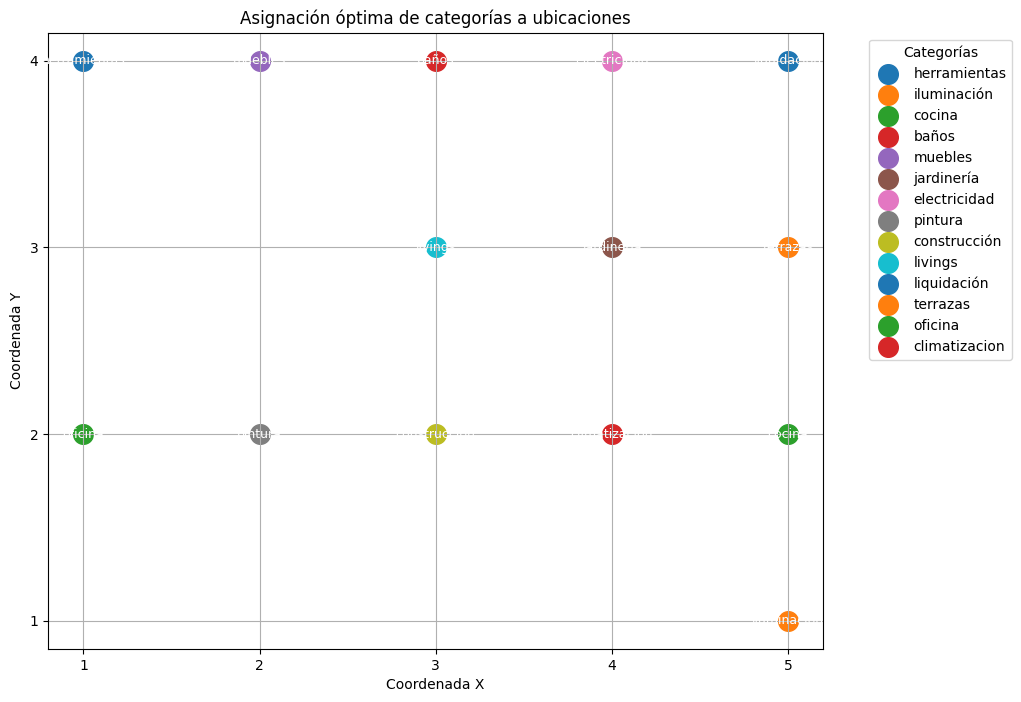

In [86]:
import matplotlib.pyplot as plt

# Suponemos que las coordenadas de las ubicaciones son uniformemente espaciadas en una cuadrícula
coordenadas_ubicaciones = [(x, y) for x in range(1, 6) for y in range(1, 5)]  # Cambiar según la disposición real de las ubicaciones

# Extraemos la asignación óptima de las categorías a las ubicaciones
asignacion_optima = {nombres_categorias[i]: coordenadas_ubicaciones[j] for i in range(num_categorias) for j in range(num_ubicaciones) if x[i, j].X > 0.5}

# Graficamos las ubicaciones y las categorías asignadas a cada una
plt.figure(figsize=(10, 8))
for categoria, (x, y) in asignacion_optima.items():
    plt.scatter(x, y, s=200, label=categoria)
    plt.text(x, y, categoria, ha='center', va='center', fontsize=9, color='white')

# Ajustamos la visualización
plt.title('Asignación óptima de categorías a ubicaciones')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.xticks(range(1, 6))
plt.yticks(range(1, 5))
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



## Pregunta 3b

b) (10 pts) Otro modelo de machine learning ha medido la oportunidad de venta cruzada entre categorías. La matriz Jaccard-cross-category.csv refleja el % de transacciones que compra la categoría i, y que también compra la j. Además, la matriz Dist_unic.csv muestra la distancia existente entre la ubicación i y j. Usando esta información, vuelva resolver el problema de modo de maximizar la venta esperada incorporando además interacciones o efectos cruzados entre categorías. Datos disponibles en: https://shorturl.at/azMQT

In [87]:
demandas = [
    [47.61687287, 45.46325486, 42.5949262, 51.21657646, 29.12410209, 37.99182032, 44.01657754, 36.57586523, 41.29740972, 44.04405159, 39.32655898, 44.93013796, 36.58427703, 40.5005242, 40.56642843, 39.47890101, 37.70202162, 27.36885063, 47.43346286, 36.83022027],
    [44.78697191, 43.7995378, 31.38775304, 42.42893924, 36.44766297, 41.14182567, 39.12557328, 35.68414674, 38.47925534, 47.66137184, 42.79666541, 34.93115983, 40.83271446, 39.95426923, 38.4380402, 36.13908088, 45.47212632, 41.95097211, 43.05660523, 35.20542498],
    [50.30284054, 35.51573315, 45.57681269, 44.62342152, 31.03551034, 41.64586663, 42.9721177, 40.04777282, 46.08289435, 48.64078127, 42.54371149, 37.77396276, 48.13596877, 39.43397599, 36.28310865, 39.6090332, 41.8577025, 51.12348093, 36.70281581, 25.90058763],
    [39.11460598, 32.57529413, 43.71832154, 40.39126816, 44.13490827, 34.29800274, 37.50898037, 32.01953126, 43.33353336, 38.37356425, 47.24598395, 49.40035358, 42.21230156, 38.03387755, 29.7500093, 31.96681103, 32.40747989, 34.54635894, 42.84968559, 39.02832975],
    [41.94975576, 46.88175228, 30.64876014, 34.02120047, 44.38735123, 43.03269347, 33.5622635, 47.09343873, 39.66232585, 28.62301411, 43.33302672, 39.68938392, 43.17242436, 35.91146719, 36.07160904, 35.74097079, 44.28204859, 46.79154651, 47.43479266, 38.07765233],
    [38.16974005, 47.44915088, 37.18480521, 45.90836564, 47.01298038, 47.88729628, 39.12787628, 30.14961935, 41.70017076, 35.95917447, 38.54572933, 46.23459684, 47.41521825, 30.76514278, 47.61342834, 39.46970562, 39.76719685, 41.66018856, 41.58390228, 33.67169022],
    [37.9778346, 40.18910075, 44.86517465, 37.09213274, 40.05684528, 36.5268052, 41.01298605, 38.06231905, 38.96399221, 33.82446399, 38.42392252, 41.56145768, 46.84903428, 42.29242663, 37.84317681, 49.16193835, 39.72946607, 44.7571295, 42.5699928, 51.72181658],
    [31.89301598, 38.10710682, 39.51961102, 42.98201445, 40.1345078, 51.50918548, 38.56639826, 38.46632671, 47.3443486, 36.43286367, 39.18431561, 29.84313218, 45.78732255, 40.78425984, 46.91419434, 41.19666632, 42.09941007, 44.91070066, 33.37769427, 39.17958784],
    [41.38151369, 41.41157764, 38.65041247, 35.76889734, 37.1474501, 42.51714106, 38.31233867, 38.32145135, 46.19377967, 50.54214519, 41.81718314, 39.00189863, 38.87543857, 39.5408054, 35.59079433, 45.61132391, 38.07844702, 40.74634416, 44.75294612, 33.45785814],
    [35.08220938, 43.49574532, 32.18702443, 38.612848, 35.01695891, 46.67576903, 39.33779759, 34.71537117, 37.32623386, 35.11500935, 44.33068172, 37.2244107, 35.39240667, 41.66146303, 37.36502589, 35.53075687, 38.39533161, 33.04319604, 31.57620702, 44.22663774],
    [42.52461511, 42.00398955, 38.61297279, 38.20908712, 38.76441874, 40.79551187, 42.99252936, 42.87049153, 49.19518956, 41.058137, 32.62932509, 31.86038541, 39.36256121, 41.87557535, 45.01503754, 29.00756568, 31.94215269, 37.6977514, 42.494567, 54.08526563],
    [35.84775201, 32.90680955, 36.84742199, 42.90271559, 39.06801611, 50.39106258, 44.24963972, 39.07720871, 38.31709108, 41.98150359, 40.7013107, 45.4286557, 38.68951001, 33.53263183, 36.67018856, 40.08726906, 40.39038478, 36.76956341, 54.97939283, 47.8949749],
    [40.18467927, 49.35332995, 37.79996253, 40.96200768, 48.37060779, 35.39783433, 45.10572169, 39.42584884, 41.95935369, 34.34976522, 33.71797804, 37.20296347, 43.61047943, 46.10224389, 32.46025887, 39.70994028, 38.90520265, 37.9591068, 43.3502401, 44.0830192],
    [42.55510708, 42.20401777, 30.22410213, 41.84636854, 39.31751872, 30.80842693, 42.06544294, 38.06709869, 40.13468215, 43.94165167, 44.52956419, 38.60715585, 41.37346687, 46.14849883, 40.15251575, 42.66712747, 37.12956754, 36.11306065, 38.87894521, 41.43732785]
]

jaccard_df= [
    [0, 0, 0, 0, 0.1, 0, 0.1, 0.1, 0.8, 0, 0, 0, 0, 0.1],
    [0,0,0.1,0.1,0,0,0.6,0,0.3,0.1,0,0,0.2,0],
    [0,0.1,0,0.4,0.2,0,0.1,0.3,0.1,0,0,0,0,0],
    [0,0.1,0.4,0,0.1,0,0.1,0.1,0.2,0,0,0,0.1,0],
    [0.1,0,0.2,0.1,0,0,0,0,0,0.4,0.3,0.1,0.3,0],
    [0,0,0,0,0,0,0,0,0,0,0,0.3,0,0],
    [0.1,0.6,0.1,0.1,0,0,0,0,0.2,0,0,0,0.3,0.3],
    [0.1,0,0.3,0.1,0,0,0,0,0.2,0.3,0,0,0.2,0],
    [0.8,0.3,0.1,0.2,0,0,0.2,0.2,0,0,0,0,0,0.3],
    [0,0.1,0,0,0.4,0,0,0.3,0,0,0,0.1,0,0.2],
    [0,0,0,0,0.3,0,0,0,0,0,0,0.3,0.2,0.1],
    [0,0,0,0,0.1,0.3,0,0,0,0.1,0.3,0,0,0],
    [0,0.2,0,0.1,0.3,0,0.3,0.2,0,0,0.2,0,0,0.5],
    [0.1,0,0,0,0,0,0.3,0,0.3,0.2,0.1,0,0.5,0]
]

dist_ubic_df = [
    [0,20,40,60,80,28.2843,44.7214,63.2456,82.4621,101.9804,100,101.9804,107.7033,116.619,128.0625,82.4621,89.4427,100,113.1371,128.0625],
    [20,0,20,40,60,44.7214,56.5685,72.111,89.4427,107.7033,101.9804,100,101.9804,107.7033,116.619,63.2456,72.111,84.8528,100,116.619],
    [40,20,0,20,40,63.2456,72.111,84.8528,100,116.619,107.7033,101.9804,100,101.9804,107.7033,44.7214,56.5685,72.111,89.4427,107.7033],
    [60,40,20,0,20,82.4621,89.4427,100,113.1371,128.0625,116.619,107.7033,101.9804,100,101.9804,28.2843,44.7214,63.2456,82.4621,101.9804],
    [80,60,40,20,0,101.9804,107.7033,116.619,128.0625,141.4214,128.0625,116.619,107.7033,101.9804,100,20,40,60,80,100],
    [28.2843,44.7214,63.2456,82.4621,101.9804,0,20,40,60,80,82.4621,89.4427,100,113.1371,128.0625,100,101.9804,107.7033,116.619,128.0625],
    [44.7214,56.5685,72.111,89.4427,107.7033,20,0,20,40,60,63.2456,72.111,84.8528,100,116.619,101.9804,100,101.9804,107.7033,116.619],
    [63.2456,72.111,84.8528,100,116.619,40,20,0,20,40,44.7214,56.5685,72.111,89.4427,107.7033,107.7033,101.9804,100,101.9804,107.7033],
    [82.4621,89.4427,100,113.1371,128.0625,60,40,20,0,20,28.2843,44.7214,63.2456,82.4621,101.9804,116.619,107.7033,101.9804,100,101.9804],
    [101.9804,107.7033,116.619,128.0625,141.4214,80,60,40,20,0,20,40,60,80,100,128.0625,116.619,107.7033,101.9804,100],
    [100,101.9804,107.7033,116.619,128.0625,82.4621,63.2456,44.7214,28.2843,20,0,20,40,60,80,113.1371,100,89.4427,82.4621,80],
    [101.9804,100,101.9804,107.7033,116.619,89.4427,72.111,56.5685,44.7214,40,20,0,20,40,60,100,84.8528,72.111,63.2456,60],
    [107.7033,101.9804,100,101.9804,107.7033,100,84.8528,72.111,63.2456,60,40,20,0,20,40,89.4427,72.111,56.5685,44.7214,40],
    [116.619,107.7033,101.9804,100,101.9804,113.1371,100,89.4427,82.4621,80,60,40,20,0,20,82.4621,63.2456,44.7214,28.2843,20],
    [128.0625,116.619,107.7033,101.9804,100,128.0625,116.619,107.7033,101.9804,100,80,60,40,20,0,80,60,40,20,0],
    [82.4621,63.2456,44.7214,28.2843,20,100,101.9804,107.7033,116.619,128.0625,113.1371,100,89.4427,82.4621,80,0,20,40,60,80],
    [89.4427,72.111,56.5685,44.7214,40,101.9804,100,101.9804,107.7033,116.619,100,84.8528,72.111,63.2456,60,20,0,20,40,60],
    [100,84.8528,72.111,63.2456,60,107.7033,101.9804,100,101.9804,107.7033,89.4427,72.111,56.5685,44.7214,40,40,20,0,20,40],
    [113.1371,100,89.4427,82.4621,80,116.619,107.7033,101.9804,100,101.9804,82.4621,63.2456,44.7214,28.2843,20,60,40,20,0,20],
    [128.0625,116.619,107.7033,101.9804,100,128.0625,116.619,107.7033,101.9804,100,80,60,40,20,0,80,60,40,20,0]
]

In [88]:
import gurobipy as gp
from gurobipy import GRB

# Definir el modelo de optimización
model = gp.Model("AsignacionCategoriasConInteracciones")

# Configurar el modelo para no imprimir la información del proceso de optimización
model.setParam('OutputFlag', 0)

# Definir las variables de decisión
categorias = range(len(demandas))
ubicaciones = range(len(dist_ubic_df))
x = model.addVars(categorias, ubicaciones, vtype=GRB.BINARY, name="x")

# Establecer la función objetivo
model.setObjective(
    gp.quicksum(demandas[i][j] * x[i, j] for i in categorias for j in ubicaciones) +
    gp.quicksum(jaccard_df[i][k] * dist_ubic_df[j][l] * x[i, j] * x[k, l]
                for i in categorias for k in categorias if i != k
                for j in ubicaciones for l in ubicaciones if j != l),
    GRB.MAXIMIZE)

# Agregar restricciones: cada categoría se asigna exactamente a una ubicación
for i in categorias:
    model.addConstr(gp.quicksum(x[i, j] for j in ubicaciones) == 1, name=f"Categoria_{i}_Asignacion")

# Agregar restricciones: cada ubicación contiene como máximo una categoría
for j in ubicaciones:
    model.addConstr(gp.quicksum(x[i, j] for i in categorias) <= 1, name=f"Ubicacion_{j}_Asignacion")

# Establecer el límite de iteraciones
model.setParam(GRB.Param.NodeLimit, 400)

# Optimizar el modelo
model.optimize()

# Imprimir la solución
print("Asignación óptima de categorías a ubicaciones (con interacciones):")
for i in categorias:
    for j in ubicaciones:
        if x[i, j].X > 0.5:
            print(f"- Categoría {i+1} -> Ubicación {j+1}")


Asignación óptima de categorías a ubicaciones (con interacciones):
- Categoría 1 -> Ubicación 11
- Categoría 2 -> Ubicación 10
- Categoría 3 -> Ubicación 19
- Categoría 4 -> Ubicación 8
- Categoría 5 -> Ubicación 2
- Categoría 6 -> Ubicación 12
- Categoría 7 -> Ubicación 16
- Categoría 8 -> Ubicación 6
- Categoría 9 -> Ubicación 5
- Categoría 10 -> Ubicación 20
- Categoría 11 -> Ubicación 9
- Categoría 12 -> Ubicación 4
- Categoría 13 -> Ubicación 15
- Categoría 14 -> Ubicación 1


In [89]:
# Imprimir la solución
try:
    print('Funcion objetivo: ', str(round(m.ObjVal,2)))
    for v in m.getVars():
        print(str(v.VarName)+'='+str(round(v.x,2)))
except:
    print('Infactible')

Funcion objetivo:  692.03
x[0,0]=0.0
x[0,1]=-0.0
x[0,2]=-0.0
x[0,3]=1.0
x[0,4]=-0.0
x[0,5]=-0.0
x[0,6]=-0.0
x[0,7]=-0.0
x[0,8]=-0.0
x[0,9]=-0.0
x[0,10]=-0.0
x[0,11]=-0.0
x[0,12]=-0.0
x[0,13]=-0.0
x[0,14]=-0.0
x[0,15]=-0.0
x[0,16]=-0.0
x[0,17]=-0.0
x[0,18]=-0.0
x[0,19]=-0.0
x[1,0]=0.0
x[1,1]=-0.0
x[1,2]=-0.0
x[1,3]=-0.0
x[1,4]=-0.0
x[1,5]=-0.0
x[1,6]=-0.0
x[1,7]=-0.0
x[1,8]=-0.0
x[1,9]=-0.0
x[1,10]=-0.0
x[1,11]=-0.0
x[1,12]=-0.0
x[1,13]=-0.0
x[1,14]=-0.0
x[1,15]=-0.0
x[1,16]=1.0
x[1,17]=-0.0
x[1,18]=-0.0
x[1,19]=-0.0
x[2,0]=0.0
x[2,1]=-0.0
x[2,2]=-0.0
x[2,3]=-0.0
x[2,4]=-0.0
x[2,5]=-0.0
x[2,6]=-0.0
x[2,7]=-0.0
x[2,8]=-0.0
x[2,9]=-0.0
x[2,10]=-0.0
x[2,11]=-0.0
x[2,12]=-0.0
x[2,13]=-0.0
x[2,14]=-0.0
x[2,15]=-0.0
x[2,16]=-0.0
x[2,17]=1.0
x[2,18]=-0.0
x[2,19]=-0.0
x[3,0]=-0.0
x[3,1]=-0.0
x[3,2]=-0.0
x[3,3]=-0.0
x[3,4]=-0.0
x[3,5]=-0.0
x[3,6]=-0.0
x[3,7]=-0.0
x[3,8]=-0.0
x[3,9]=-0.0
x[3,10]=0.0
x[3,11]=1.0
x[3,12]=-0.0
x[3,13]=-0.0
x[3,14]=-0.0
x[3,15]=-0.0
x[3,16]=-0.0
x[3,17]=-0.0
x[3,18]=

## BIBLIOGRAFIA
Correa, S. (2021, Abril 21). Sergio Correa [Canal de YouTube]. YouTube. https://www.youtube.com/@sergiocorrea1179